In [1]:
import numpy as np
import pandas as pd
from dateutil.parser import parse
import matplotlib.pyplot as plt
import yfinance
from datetime import datetime

In [2]:
start = datetime(2011, 1, 1)
data = yfinance.download('BTC-USD', start)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-30,29357.093750,29443.169922,29059.501953,29275.308594,29275.308594,8678454527
2023-07-31,29278.314453,29489.873047,29131.578125,29230.111328,29230.111328,11656781982
2023-08-01,29230.873047,29675.732422,28657.023438,29675.732422,29675.732422,18272392391
2023-08-02,29704.146484,29987.998047,28946.509766,29151.958984,29151.958984,19212655598
2023-08-04,29196.816406,29221.357422,29117.644531,29153.138672,29153.138672,12334159872


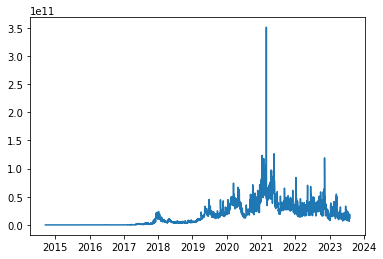

In [5]:
plt.plot(data['Volume'])

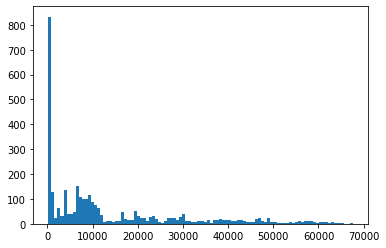

In [6]:
plt.hist(data['Close'], 100)
plt.show()

In [7]:
data = data.assign(bins=pd.cut(data['Close'], 100))

In [8]:
vp = data.groupby('bins').sum().drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close'])
vp

,Volume
bins,
"(110.714, 851.99]",45529047788
"(851.99, 1525.877]",32652960940
"(1525.877, 2199.765]",24849811936
"(2199.765, 2873.652]",83327936896
"(2873.652, 3547.539]",132095919297
...,...
"(64197.392, 64871.279]",70945425123
"(64871.279, 65545.166]",109733553805
"(65545.166, 66219.054]",40788955582


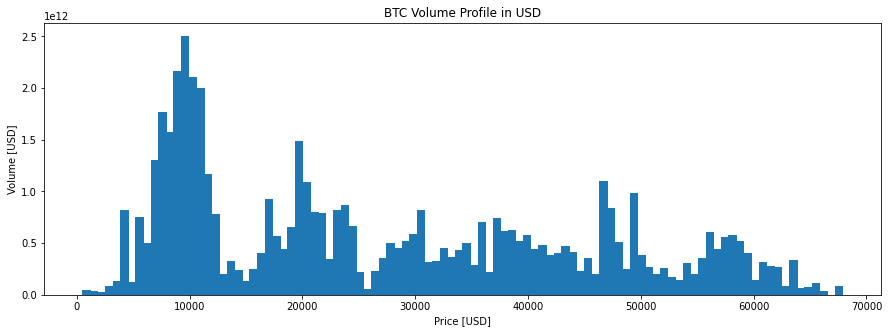

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(np.array([i.right for i in vp.index]), np.array(vp['Volume'].to_numpy()), width=741.276)
plt.xlabel('Price [USD]')
plt.ylabel('Volume [USD]')
plt.title('BTC Volume Profile in USD')
plt.show()